In [159]:
import geopandas
import matplotlib.pyplot as plt
import contextily
from shapely.geometry import Point
import rasterio
import rasterio.plot
import rasterstats
import matplotlib.colors as colors
import matplotlib.colors as mcolors


In [3]:
mining_sites = geopandas.read_file("D:\Data\Mines\ipis_cod_mines.geojson")
mining_sites.head()

visit_date                                name  n_workers mineral  \
0  2013-03-27                           Mayi-Tatu      150.0    Gold   
1  2013-03-27                             Mabanga      115.0    Gold   
2  2013-03-27                             Molende      130.0    Gold   
3  2013-03-27                          Embouchure      135.0    Gold   
4  2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0    Gold   

                   geometry  
0  POINT (29.66033 1.01089)  
1  POINT (29.65862 1.00308)  
2  POINT (29.65629 0.98563)  
3  POINT (29.64494 0.99976)  
4  POINT (29.66000 0.95600)

In [4]:
mining_sites.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

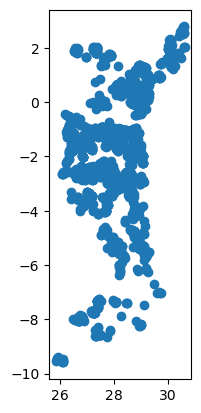

In [5]:
mining_sites.plot()

In [6]:
df=geopandas.read_file(r"C:\Users\Nevra\Pictures\Downloads\wdpamay2017cod-shapefile-polygons.geojson")
df.head()

WDPAID   WDPA_PID PA_DEF                              NAME  \
0  555555524.0  555555524      1  Lyondji Bonobo Community Reserve   
1     478291.0     478291      1         Parc national des Virunga   
2      72340.0      72340      1            Luo Scientific Reserve   
3     478292.0     478292      1                           Salonga   
4       9143.0       9143      1        Réserve forestière de Luki   

                                       ORIG_NAME  \
0  Réserve Communautaires des Bonobos d' Iyondji   
1                      Parc national des Virunga   
2                 Réserve Scientifique de la Luo   
3                    Parc National de la Salonga   
4                     Réserve forestière de Luki   

                                              DESIG  \
0            Forêt Classée et Réserve Communautaire   
1  Ramsar Site, Wetland of International Importance   
2                                           Réserve   
3                       Réserve Naturelle Integrale   
4                      UNESCO-MAB Biosphere Reserve   

                                          DESIG_ENG     DESIG_TYPE  \
0           Classified Forest and Community Reserve       National   
1  Ramsar Site, Wetland of International Importance  International   
2                                Scientific Reserve       National   
3                          Integrale Nature Reserve       National   
4                      UNESCO-MAB Biosphere Reserve  International   

         IUCN_CAT        INT_CRIT  ...                         GOV_TYPE  \
0    Not Reported  Not Applicable  ...         Collaborative governance   
1    Not Reported    Not Reported  ...                     Not Reported   
2    Not Reported  Not Applicable  ...  Government-delegated management   
3              II  Not Applicable  ...                     Not Reported   
4  Not Applicable  Not Applicable  ...                     Not Reported   

       OWN_TYPE                                          MANG_AUTH  \
0  Not Reported  l'Institut CongolaispourConservation dela Natu...   
1  Not Reported                                       Not Reported   
2  Not Reported  Center for Research in Natural Sciences (CRSN/...   
3  Not Reported                                       Not Reported   
4  Not Reported                                       Not Reported   

                                           MANG_PLAN           VERIF  \
0                                       Not Reported    Not Reported   
1  Management plan is not implented but is available  State Verified   
2                                       Not Reported    Not Reported   
3                                       Not Reported    Not Reported   
4                                       Not Reported    Not Reported   

  METADATAID       SUB_LOC PARENT_ISO  ISO3  \
0       1717  Not Reported        COD   COD   
1       1856  Not Reported        COD   COD   
2       1717  Not Reported        COD   COD   
3       1717  Not Reported        COD   COD   
4        715         CD-KW        COD   COD   

                                            geometry  
0  MULTIPOLYGON (((22.78361 0.18587, 22.78492 0.1...  
1  MULTIPOLYGON (((29.11713 -1.64822, 29.11765 -1...  
2  MULTIPOLYGON (((22.56673 0.24907, 22.57264 0.2...  
3  MULTIPOLYGON (((20.47664 -1.53041, 20.47703 -1...  
4  MULTIPOLYGON (((13.24173 -5.50931, 13.23929 -5...  

[5 rows x 29 columns]

In [7]:
df.columns

Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'geometry'],
      dtype='object')

In [8]:
df.DESIG_ENG

0              Classified Forest and Community Reserve
1     Ramsar Site, Wetland of International Importance
2                                   Scientific Reserve
3                             Integrale Nature Reserve
4                         UNESCO-MAB Biosphere Reserve
5                                       Nature Reserve
6                                        National Park
7                                       Nature Reserve
8                                       Nature Reserve
9                                        National Park
10                                       National Park
11                                       National Park
12                                       National Park
13                                       National Park
14                                        Hunting Area
15                                        Hunting Area
16                                        Not Reported
17                                        Not Reported
18        

Text(0.5, 1.0, 'Protected Areas by Type in the Democratic Republic of the Congo')

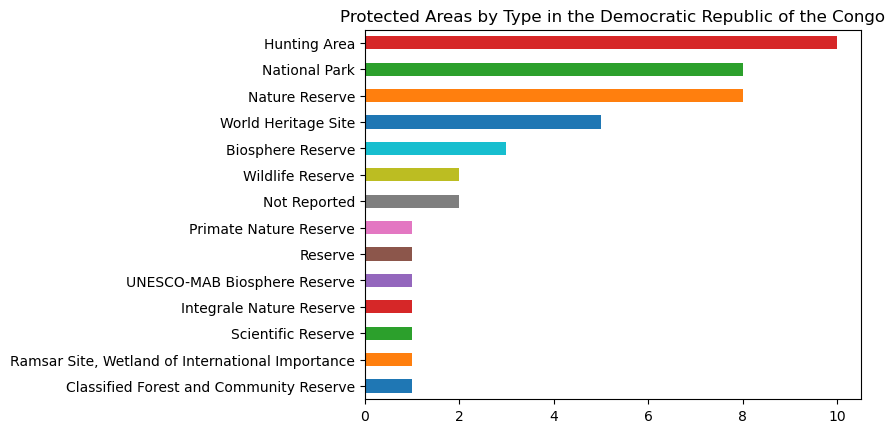

In [161]:
df.DESIG_ENG.value_counts().sort_values().plot(kind="barh",color=mcolors.TABLEAU_COLORS)
plt.title("Protected Areas by Type in the Democratic Republic of the Congo")

In [166]:
protected_areas=df[["DESIG_ENG","NAME","geometry"]]
protected_areas.head()

DESIG_ENG  \
0           Classified Forest and Community Reserve   
1  Ramsar Site, Wetland of International Importance   
2                                Scientific Reserve   
3                          Integrale Nature Reserve   
4                      UNESCO-MAB Biosphere Reserve   

                               NAME  \
0  Lyondji Bonobo Community Reserve   
1         Parc national des Virunga   
2            Luo Scientific Reserve   
3                           Salonga   
4        Réserve forestière de Luki   

                                            geometry  
0  MULTIPOLYGON (((22.78361 0.18587, 22.78492 0.1...  
1  MULTIPOLYGON (((29.11713 -1.64822, 29.11765 -1...  
2  MULTIPOLYGON (((22.56673 0.24907, 22.57264 0.2...  
3  MULTIPOLYGON (((20.47664 -1.53041, 20.47703 -1...  
4  MULTIPOLYGON (((13.24173 -5.50931, 13.23929 -5...

In [174]:
protected_areas.groupby("DESIG_ENG")["geometry"].count()

DESIG_ENG
Biosphere Reserve                                    3
Classified Forest and Community Reserve              1
Hunting Area                                        10
Integrale Nature Reserve                             1
National Park                                        8
Nature Reserve                                       8
Not Reported                                         2
Primate Nature Reserve                               1
Ramsar Site, Wetland of International Importance     1
Reserve                                              1
Scientific Reserve                                   1
UNESCO-MAB Biosphere Reserve                         1
Wildlife Reserve                                     2
World Heritage Site                                  5
Name: geometry, dtype: int64

In [76]:
protected_areas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

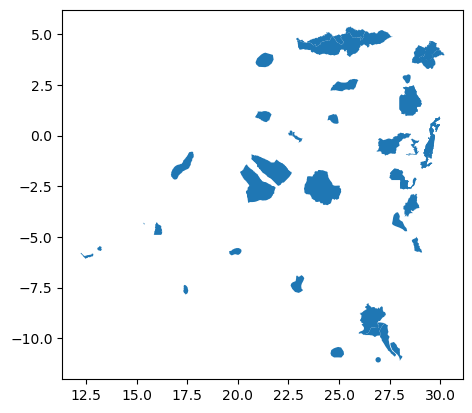

In [77]:
protected_areas.plot()

<AxesSubplot:>

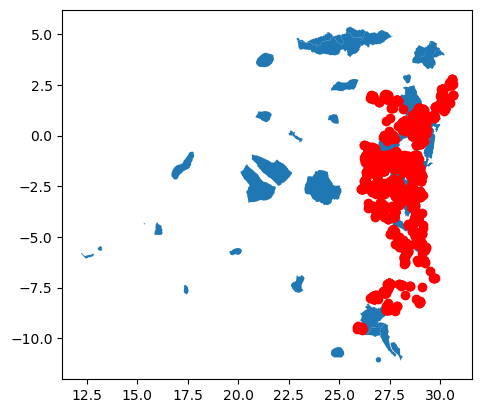

In [78]:
ax=protected_areas.plot()
mining_sites.plot(ax=ax,color="red")

In [79]:
mining_sites_utm = mining_sites.to_crs("EPSG:32735")
protected_areas_utm = protected_areas.to_crs("EPSG:32735")

In [80]:
mining_sites_utm.crs

<Projected CRS: EPSG:32735>
Name: WGS 84 / UTM zone 35S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, southern hemisphere between 80°S and equator, onshore and offshore. Botswana. Burundi. Democratic Republic of the Congo (Zaire). Rwanda. South Africa. Tanzania. Uganda. Zambia. Zimbabwe.
- bounds: (24.0, -80.0, 30.0, 0.0)
Coordinate Operation:
- name: UTM zone 35S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

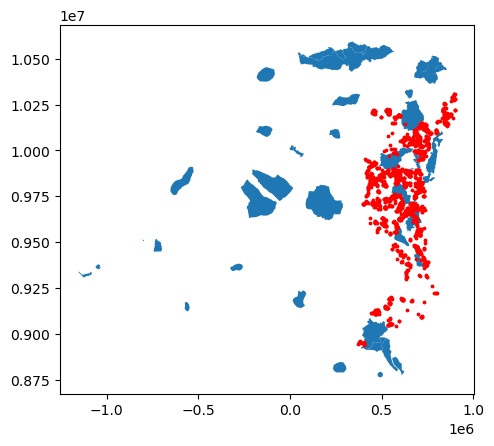

In [81]:
ax = protected_areas_utm.plot()
mining_sites_utm.plot(ax=ax, color='red',markersize=3)
plt.show()

In [82]:
mining_sites_utm.to_file("D:\Data\Congo\ipis_cod_mines_utm.gpkg",driver='GPKG')
protected_areas_utm.to_file("D:\Data\Congo\cod_conservation_utm.shp", driver='ESRI Shapefile')

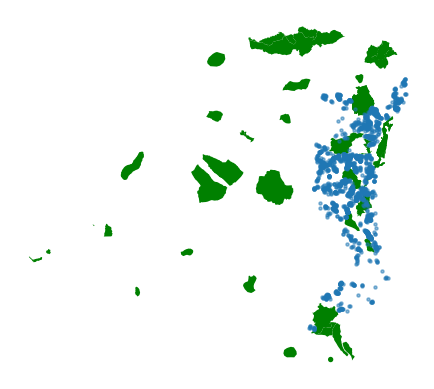

In [83]:
ax=protected_areas_utm.plot(color="green")
mining_sites_utm.plot(ax=ax,markersize=5,alpha=0.5)
ax.set_axis_off()

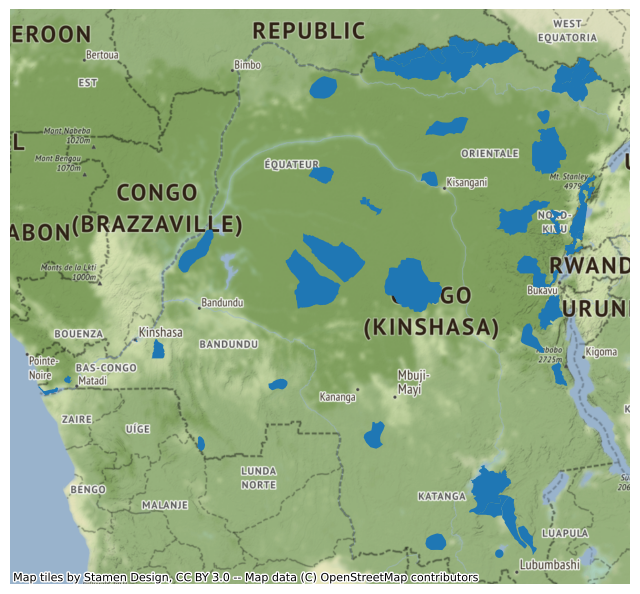

In [84]:
ax=protected_areas_utm.to_crs("EPSG:3857").plot(figsize=(8,8))
contextily.add_basemap(ax)
ax.set_axis_off()

In [19]:
contextily.providers.keys()

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'Stamen', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava'])

In [20]:
contextily.providers.OpenStreetMap.keys()

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH', 'BlackAndWhite'])

In [21]:
contextily.providers.Esri.keys()

dict_keys(['WorldStreetMap', 'DeLorme', 'WorldTopoMap', 'WorldImagery', 'WorldTerrain', 'WorldShadedRelief', 'WorldPhysical', 'OceanBasemap', 'NatGeoWorldMap', 'WorldGrayCanvas', 'ArcticImagery', 'ArcticOceanBase', 'ArcticOceanReference', 'AntarcticImagery', 'AntarcticBasemap'])

In [23]:
border=geopandas.read_file(r"C:\Users\Nevra\Pictures\Downloads\codadmbndaadm120170407.geojson")

Text(0.5, 1.0, 'Protected Areas in the Democratic Republic of the Congo')

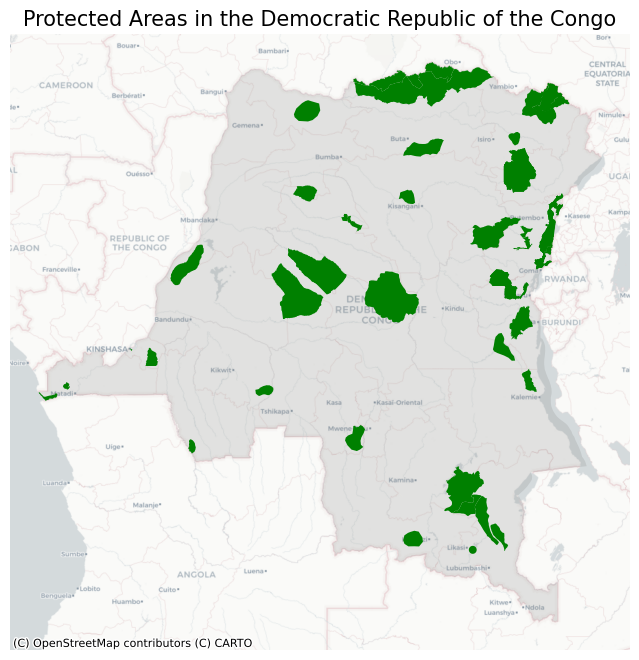

In [156]:
ax=border.to_crs("EPSG:3857").plot(figsize=(8,8),color="gray",alpha=0.2)
protected_areas_utm.to_crs("EPSG:3857").plot(ax=ax,figsize=(8,8),color="green")
contextily.add_basemap(ax,source=contextily.providers.CartoDB.Positron)
ax.set_axis_off()
plt.title("Protected Areas in the Democratic Republic of the Congo",size=15)


In [86]:
protected_areas_utm.geometry.area.sum()

316322866575.1945

In [38]:
mining_sites_utm.mineral

0              Gold
1              Gold
2              Gold
3              Gold
4              Gold
           ...     
2138    Cassiterite
2139         Coltan
2140     Wolframite
2141    Cassiterite
2142    Cassiterite
Name: mineral, Length: 2143, dtype: object

In [ ]:
border.head()

OBJECTID  CODE_INS             NOM SCE_SEM        SCE_GEO       MODIF  \
0         1      82.0  Kasaï-Oriental     INS  UNOCHA / UNDP  2010-06-18   
1         2      51.0          Tshopo     INS  UNOCHA / UNDP  2010-06-18   
2         3      54.0           Ituri     INS  UNOCHA / UNDP  2010-06-18   
3         4      20.0   Kongo-Central     INS  UNOCHA / UNDP  2010-06-18   
4        14      33.0      Maï-Ndombe     INS  UNOCHA / UNDP  2010-06-18   

                     ORIGINE PCode  \
0  Numerisation Saint Moulin  CD82   
1  Numerisation Saint Moulin  CD51   
2  Numerisation Saint Moulin  CD54   
3  Numerisation Saint Moulin  CD20   
4  Numerisation Saint Moulin  CD33   

                                            geometry  
0  POLYGON ((23.73511 -5.68923, 23.73781 -5.69317...  
1  POLYGON ((23.59908 2.20184, 23.59396 2.19113, ...  
2  POLYGON ((31.30494 2.11900, 31.26026 2.04523, ...  
3  POLYGON ((14.41276 -4.31460, 14.41882 -4.32696...  
4  POLYGON ((19.15473 -0.82204, 19.16991 -0.85066...

<AxesSubplot:>

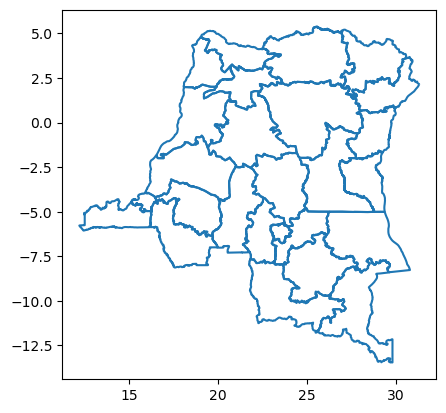

In [65]:
border.boundary.plot()

Text(0.5, 1.0, 'Mining Sites in Congo')

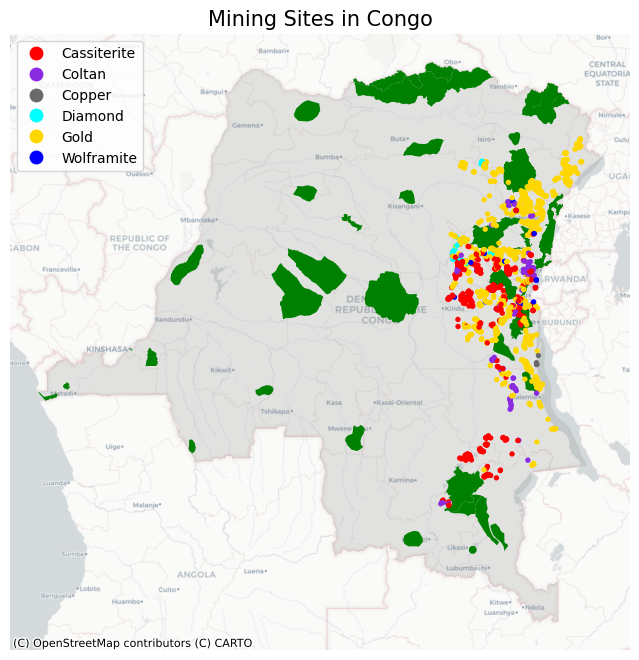

In [87]:
ax=border.to_crs("EPSG:3857").plot(figsize=(8,8),color="gray",alpha=0.2)
protected_areas_utm.to_crs("EPSG:3857").plot(ax=ax,color="green")
mining_sites_utm.to_crs("EPSG:3857").plot(ax=ax,column="mineral",markersize=8,legend=True,cmap=colors.ListedColormap(["red","blueviolet","dimgray","aqua","gold","blue"]))
ax.set_axis_off()
contextily.add_basemap(ax,source=contextily.providers.CartoDB.Positron)
plt.title("Mining Sites in Congo",size=15)

In [ ]:
mining_sites_utm

visit_date                                name  n_workers      mineral  \
0     2013-03-27                           Mayi-Tatu      150.0         Gold   
1     2013-03-27                             Mabanga      115.0         Gold   
2     2013-03-27                             Molende      130.0         Gold   
3     2013-03-27                          Embouchure      135.0         Gold   
4     2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0         Gold   
...          ...                                 ...        ...          ...   
2138  2017-12-14                                  G4      150.0  Cassiterite   
2139  2017-08-28                             Busonga        5.0       Coltan   
2140  2017-08-28                      Buterere/Jolie       15.0   Wolframite   
2141  2017-08-30                           Rusengasi       80.0  Cassiterite   
2142  2017-08-31                            Kambasha       37.0  Cassiterite   

                             geometry  
0     POINT (796089.416 10111855.174)  
1     POINT (795899.664 10110990.840)  
2     POINT (795641.707 10109059.787)  
3     POINT (794376.309 10110622.250)  
4     POINT (796057.504 10105781.548)  
...                               ...  
2138   POINT (563553.658 9744447.722)  
2139   POINT (731723.859 9780128.598)  
2140   POINT (732096.620 9779660.636)  
2141   POINT (728652.127 9751207.676)  
2142   POINT (729069.101 9750106.765)  

[2143 rows x 5 columns]

In [68]:
percentage_mining_sites=mining_sites.mineral.value_counts(normalize=True)
percentage_mining_sites

Gold           0.686888
Cassiterite    0.222119
Coltan         0.052263
Diamond        0.021465
Wolframite     0.015399
Copper         0.001867
Name: mineral, dtype: float64

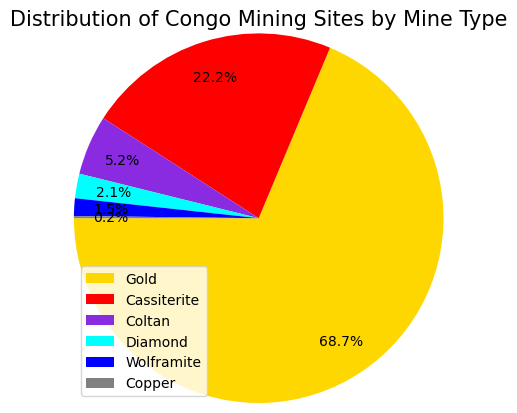

In [196]:
plt.pie(percentage_mining_sites,autopct='%1.1f%%',startangle=180, textprops={'fontsize':10},pctdistance=0.8,radius=1.25,colors=["gold","red","blueviolet","aqua","blue","gray"])
plt.title("Distribution of Congo Mining Sites by Mine Type",size=15)
plt.legend(labels=percentage_mining_sites.index)

In [ ]:
mining_sites_utm.n_workers.describe()

count     2143.000000
mean       161.690621
std        500.503089
min          1.000000
25%         34.000000
50%         68.000000
75%        132.000000
max      16458.000000
Name: n_workers, dtype: float64

In [ ]:
mining_sites_utm.groupby("mineral").n_workers.mean()

mineral
Cassiterite    154.218487
Coltan         103.750000
Copper         178.000000
Diamond        187.760870
Gold           168.500679
Wolframite     124.030303
Name: n_workers, dtype: float64

Text(0.5, 1.0, 'The Average Number of Workers in Mining Sites by Mineral Types')

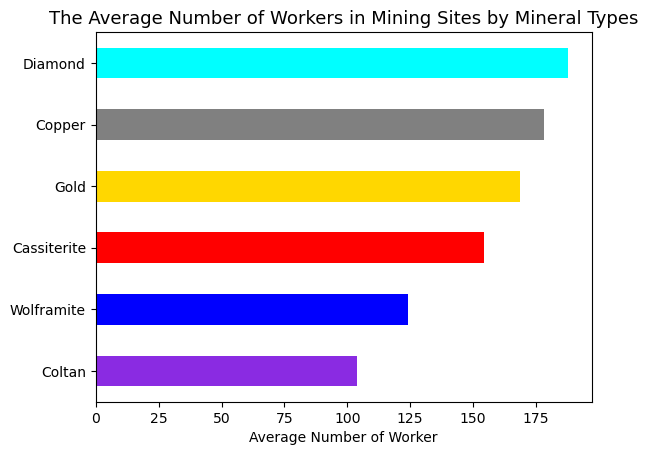

In [206]:
mining_sites_utm.groupby("mineral").n_workers.mean().sort_values().plot(kind="barh",color=["blueviolet","blue","red","gold","gray","aqua"])
plt.xlabel("Average Number of Worker")
plt.ylabel("")
plt.title("The Average Number of Workers in Mining Sites by Mineral Types",size=13)

In [89]:
goma=Point(746989.5594829298,9816380.942287602)

In [90]:
print(goma)

POINT (746989.5594829298 9816380.942287602)


In [91]:
print(type(goma))

<class 'shapely.geometry.point.Point'>


In [92]:
goma_buffer = goma.buffer(50000)

In [93]:
print(type(goma_buffer))
print(goma_buffer)

<class 'shapely.geometry.polygon.Polygon'>
POLYGON ((796989.5594829298 9816380.942287602, 796748.7958165396 9811480.085271124, 796028.8235030912 9806626.426186794, 794836.5762695402 9801866.70842488, 793183.536108494 9797246.770669347, 791085.6227003476 9792811.105446301, 788563.040098057 9788602.430636622, 785640.0821510666 9784661.278079418, 782344.8985422571 9781025.603228275, 778709.223691112 9777730.419619465, 774768.0711339099 9774807.461672474, 770559.3963242297 9772284.879070183, 766123.7311011843 9770186.965662038, 761503.7933456529 9768533.92550099, 756744.0755837362 9767341.67826744, 751890.4164994078 9766621.705953991, 746989.5594829298 9766380.942287602, 742088.7024664517 9766621.705953991, 737235.0433821233 9767341.67826744, 732475.3256202067 9768533.92550099, 727855.3878646753 9770186.965662038, 723419.7226416299 9772284.879070183, 719211.0478319497 9774807.461672474, 715269.8952747475 9777730.419619465, 711634.2204236024 9781025.603228275, 708339.0368147929 9784661.2780

In [94]:
mask=mining_sites_utm.within(goma_buffer)
mask

0       False
1       False
2       False
3       False
4       False
        ...  
2138    False
2139     True
2140     True
2141    False
2142    False
Length: 2143, dtype: bool

In [95]:
mask.sum()

87

In [96]:
goma_mining_sites_utm=mining_sites_utm[mask]
goma_mining_sites_utm

visit_date              name  n_workers      mineral  \
293   2017-03-19          Bishasha       20.0   Wolframite   
294   2013-06-09        Kadahandwa       10.0   Wolframite   
295   2017-03-21           Birambo       25.0       Coltan   
296   2017-03-21          Kamatale       40.0  Cassiterite   
297   2013-06-09  Kamatale-Mugunga       70.0       Coltan   
...          ...               ...        ...          ...   
1988  2016-12-12            Ruziba       25.0       Coltan   
2008  2017-03-22             Lwizi       36.0  Cassiterite   
2082  2017-04-03            Bihula      120.0       Coltan   
2139  2017-08-28           Busonga        5.0       Coltan   
2140  2017-08-28    Buterere/Jolie       15.0   Wolframite   

                            geometry  
293   POINT (707726.099 9819062.309)  
294   POINT (705774.620 9814501.769)  
295   POINT (705916.247 9809469.387)  
296   POINT (705229.985 9808460.488)  
297   POINT (704958.606 9807929.042)  
...                              ...  
1988  POINT (701173.808 9801654.553)  
2008  POINT (708426.831 9810049.377)  
2082  POINT (700760.177 9827985.907)  
2139  POINT (731723.859 9780128.598)  
2140  POINT (732096.620 9779660.636)  

[87 rows x 5 columns]

In [97]:
goma_mining_sites_utm.crs

<Projected CRS: EPSG:32735>
Name: WGS 84 / UTM zone 35S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, southern hemisphere between 80°S and equator, onshore and offshore. Botswana. Burundi. Democratic Republic of the Congo (Zaire). Rwanda. South Africa. Tanzania. Uganda. Zambia. Zimbabwe.
- bounds: (24.0, -80.0, 30.0, 0.0)
Coordinate Operation:
- name: UTM zone 35S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [98]:
percentage_goma_mining_sites=goma_mining_sites_utm.mineral.value_counts(normalize=True)
percentage_goma_mining_sites

Cassiterite    0.390805
Coltan         0.356322
Gold           0.183908
Wolframite     0.068966
Name: mineral, dtype: float64

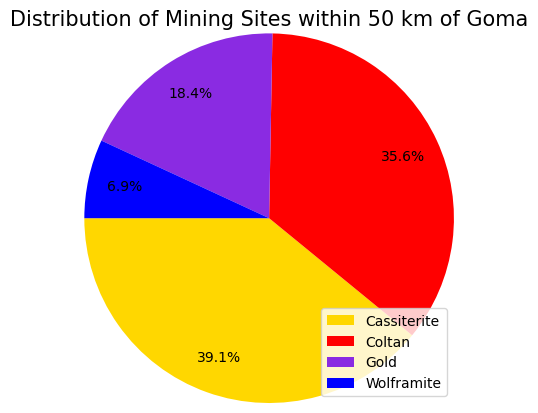

In [195]:
plt.pie(percentage_goma_mining_sites,autopct='%1.1f%%',startangle=180, textprops={'fontsize':10},pctdistance=0.8,radius=1.25,colors=["gold","red","blueviolet","blue"])
plt.title("Distribution of Mining Sites within 50 km of Goma",size=15)
plt.legend(labels=percentage_goma_mining_sites.index,loc="lower right")

In [100]:
goma_df_utm=geopandas.GeoDataFrame(geometry=[goma],crs="EPSG:32735")
goma_df_utm

geometry
0  POINT (746989.559 9816380.942)

In [101]:
goma_df_utm.crs

<Projected CRS: EPSG:32735>
Name: WGS 84 / UTM zone 35S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, southern hemisphere between 80°S and equator, onshore and offshore. Botswana. Burundi. Democratic Republic of the Congo (Zaire). Rwanda. South Africa. Tanzania. Uganda. Zambia. Zimbabwe.
- bounds: (24.0, -80.0, 30.0, 0.0)
Coordinate Operation:
- name: UTM zone 35S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [102]:
goma_buffer_df_utm=geopandas.GeoDataFrame(geometry=[goma_buffer],crs="EPSG:32735")
goma_buffer_df_utm

geometry
0  POLYGON ((796989.559 9816380.942, 796748.796 9...

In [103]:
goma_buffer_df_utm.crs

<Projected CRS: EPSG:32735>
Name: WGS 84 / UTM zone 35S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, southern hemisphere between 80°S and equator, onshore and offshore. Botswana. Burundi. Democratic Republic of the Congo (Zaire). Rwanda. South Africa. Tanzania. Uganda. Zambia. Zimbabwe.
- bounds: (24.0, -80.0, 30.0, 0.0)
Coordinate Operation:
- name: UTM zone 35S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

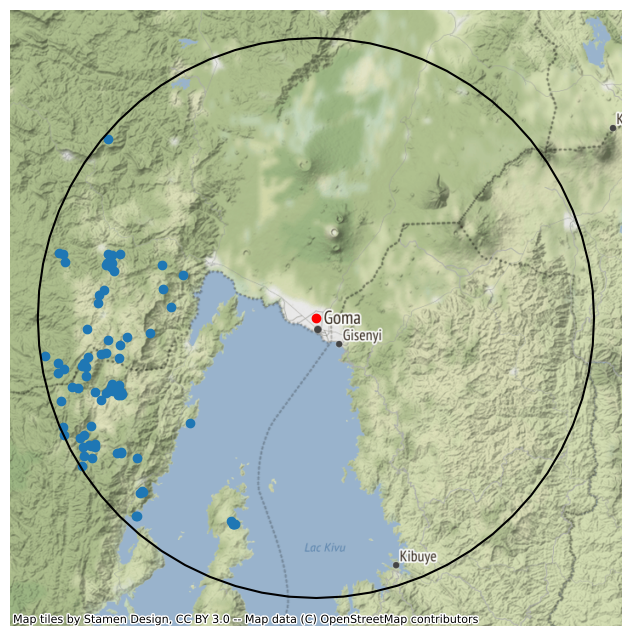

In [104]:
ax=goma_mining_sites_utm.to_crs("EPSG:3857").plot(figsize=(8,8))
goma_df_utm.to_crs("EPSG:3857").plot(ax=ax,color="red")
goma_buffer_df_utm.to_crs("EPSG:3857").boundary.plot(ax=ax,edgecolor="black")
contextily.add_basemap(ax)
ax.set_axis_off()

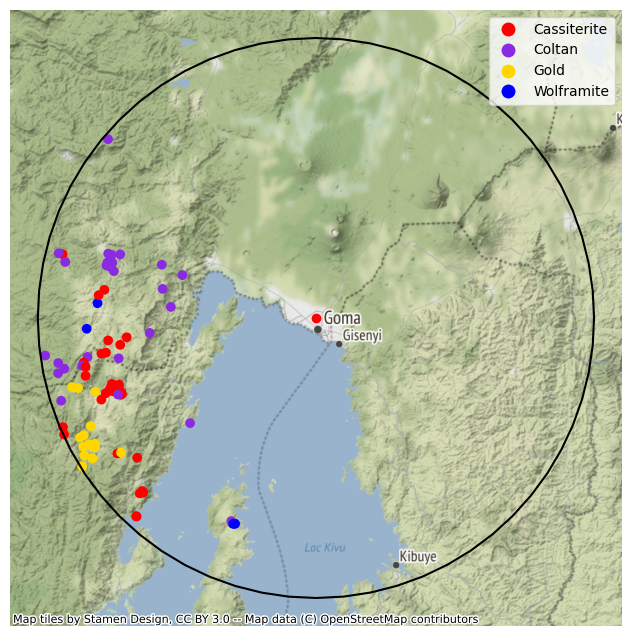

In [105]:
ax=goma_mining_sites_utm.to_crs("EPSG:3857").plot(column="mineral",figsize=(8,8),cmap=colors.ListedColormap(["red","blueviolet","gold","blue"]),legend=True)
goma_df_utm.to_crs("EPSG:3857").plot(ax=ax,color="red")
goma_buffer_df_utm.to_crs("EPSG:3857").boundary.plot(ax=ax,edgecolor="black")
contextily.add_basemap(ax)
ax.set_axis_off()

In [106]:
goma_protected_areas=protected_areas_utm.intersection(goma_buffer)
goma_protected_areas

c:\Users\Nevra\anaconda3\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


0                                         POLYGON EMPTY
1     MULTIPOLYGON (((735598.495 9817689.753, 735666...
2                                         POLYGON EMPTY
3                                         POLYGON EMPTY
4                                         POLYGON EMPTY
5                                         POLYGON EMPTY
6                                         POLYGON EMPTY
7                                         POLYGON EMPTY
8                                         POLYGON EMPTY
9                                         POLYGON EMPTY
10                                        POLYGON EMPTY
11                                        POLYGON EMPTY
12                                        POLYGON EMPTY
13                                        POLYGON EMPTY
14                                        POLYGON EMPTY
15                                        POLYGON EMPTY
16                                        POLYGON EMPTY
17                                        POLYGO

In [107]:
goma_protected_areas.crs

<Projected CRS: EPSG:32735>
Name: WGS 84 / UTM zone 35S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, southern hemisphere between 80°S and equator, onshore and offshore. Botswana. Burundi. Democratic Republic of the Congo (Zaire). Rwanda. South Africa. Tanzania. Uganda. Zambia. Zimbabwe.
- bounds: (24.0, -80.0, 30.0, 0.0)
Coordinate Operation:
- name: UTM zone 35S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'Distribution of Mining Sites and Protected Areas within 50 km of Goma')

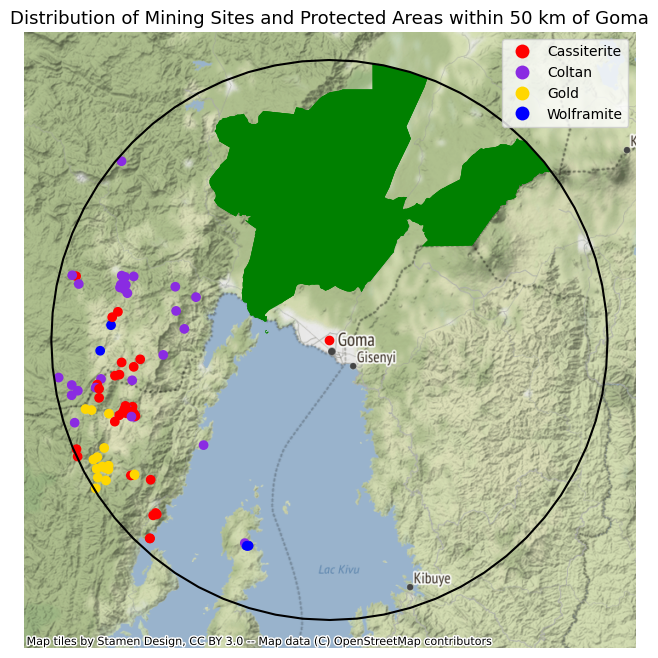

In [207]:
ax=goma_mining_sites_utm.to_crs("EPSG:3857").plot(column="mineral",figsize=(8,8),cmap=colors.ListedColormap(["red","blueviolet","gold","blue"]),legend=True)
goma_df_utm.to_crs("EPSG:3857").plot(ax=ax,color="red")
goma_buffer_df_utm.to_crs("EPSG:3857").boundary.plot(ax=ax,edgecolor="black")
goma_protected_areas.to_crs("EPSG:3857").plot(ax=ax,color="green")
contextily.add_basemap(ax)
ax.set_axis_off()
plt.title("Distribution of Mining Sites and Protected Areas within 50 km of Goma",size=13)

In [109]:
protected_areas_utm.intersection(goma_buffer).area.sum() / 1000**2

c:\Users\Nevra\anaconda3\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


3894.8385678792915

In [110]:
kahuzi=protected_areas_utm[protected_areas_utm['NAME'] == "Kahuzi-Biega"].geometry.squeeze()

In [111]:
kahuzi_df=geopandas.GeoDataFrame(geometry=[kahuzi],crs="EPSG:32735")

In [112]:
kahuzi_df

geometry
0  MULTIPOLYGON (((597783.510 9817233.531, 598593...

Text(0.5, 1.0, 'Kahuzi National Park Borders')

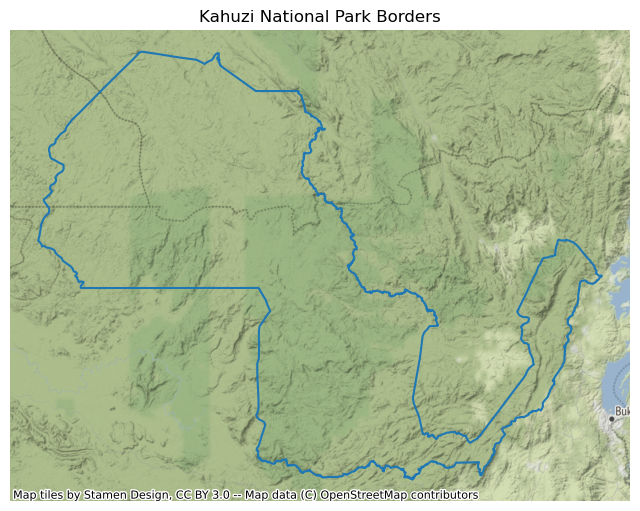

In [208]:
ax=kahuzi_df.to_crs("EPSG:3857").boundary.plot(figsize=(8,8))
contextily.add_basemap(ax)
ax.set_axis_off()
plt.title("Kahuzi National Park Borders")

In [115]:
sites_kahuzi=mining_sites_utm[mining_sites_utm.within(kahuzi)]
sites_kahuzi

visit_date                   name  n_workers      mineral  \
661   2013-08-28          Ibozia/Kalumé       80.0  Cassiterite   
662   2013-08-26                Matamba      150.0  Cassiterite   
663   2013-08-27          Mutete/Mukina      170.0  Cassiterite   
664   2013-08-28                 Mutete      100.0  Cassiterite   
760   2014-02-25              Mazankala      120.0  Cassiterite   
813   2015-07-28             Kitendebwa       50.0         Gold   
869   2013-09-28           Sebwa-Lukoma      130.0  Cassiterite   
870   2013-10-30              Rwamakaza      160.0  Cassiterite   
1481  2009-01-01               Mugaba I       50.0         Gold   
1482  2009-01-01           Mugaba Ouest       46.0         Gold   
1676  2015-08-02  Nguba(Nkuba) kamisoke      122.0  Cassiterite   

                            geometry  
661   POINT (567832.709 9759143.339)  
662   POINT (598323.539 9758688.142)  
663   POINT (570733.437 9761871.114)  
664   POINT (569881.093 9762219.111)  
760   POINT (613075.533 9722956.980)  
813   POINT (693078.928 9770107.518)  
869   POINT (660406.345 9715261.717)  
870   POINT (661266.834 9716072.199)  
1481  POINT (685167.371 9744069.967)  
1482  POINT (683156.687 9746324.416)  
1676  POINT (622151.349 9808363.111)

In [116]:
sites_kahuzi.name.count()

11

In [117]:
sites_kahuzi.crs

<Projected CRS: EPSG:32735>
Name: WGS 84 / UTM zone 35S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, southern hemisphere between 80°S and equator, onshore and offshore. Botswana. Burundi. Democratic Republic of the Congo (Zaire). Rwanda. South Africa. Tanzania. Uganda. Zambia. Zimbabwe.
- bounds: (24.0, -80.0, 30.0, 0.0)
Coordinate Operation:
- name: UTM zone 35S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [118]:
sites_kahuzi_mineral=sites_kahuzi.mineral.value_counts(normalize=True)
sites_kahuzi_mineral

Cassiterite    0.727273
Gold           0.272727
Name: mineral, dtype: float64

Text(0.5, 1.0, 'Distribution of Mining Sites in Kahuizi National Park')

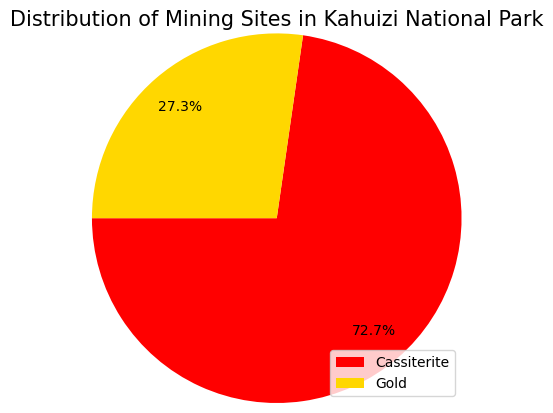

In [213]:
plt.pie(sites_kahuzi_mineral,autopct='%1.1f%%',startangle=180, textprops={'fontsize':10},pctdistance=0.8,radius=1.25,colors=["red","gold"])
plt.legend(labels=sites_kahuzi_mineral.index,loc="lower right")
plt.title("Distribution of Mining Sites in Kahuizi National Park",size=15)

Text(0.5, 1.0, 'Mining Sites in Kahuizi National Park')

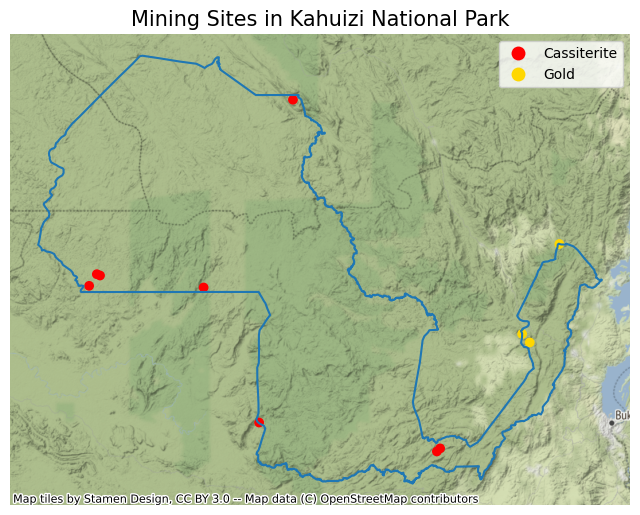

In [214]:
ax=kahuzi_df.to_crs("EPSG:3857").boundary.plot(figsize=(8,8))
sites_kahuzi.to_crs("EPSG:3857").plot(ax=ax,column="mineral",cmap=colors.ListedColormap(["red","gold"]),legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()
plt.title("Mining Sites in Kahuizi National Park",size=15)

In [121]:
protected_areas_utm

DESIG_ENG  \
0            Classified Forest and Community Reserve   
1   Ramsar Site, Wetland of International Importance   
2                                 Scientific Reserve   
3                           Integrale Nature Reserve   
4                       UNESCO-MAB Biosphere Reserve   
5                                     Nature Reserve   
6                                      National Park   
7                                     Nature Reserve   
8                                     Nature Reserve   
9                                      National Park   
10                                     National Park   
11                                     National Park   
12                                     National Park   
13                                     National Park   
14                                      Hunting Area   
15                                      Hunting Area   
16                                      Not Reported   
17                                      Not Reported   
18                                      Hunting Area   
19                                  Wildlife Reserve   
20                                           Reserve   
21                                      Hunting Area   
22                                      Hunting Area   
23                                    Nature Reserve   
24                                      Hunting Area   
25                                     National Park   
26                            Primate Nature Reserve   
27                                    Nature Reserve   
28                                      Hunting Area   
29                                      Hunting Area   
30                                 Biosphere Reserve   
31                                 Biosphere Reserve   
32                                 Biosphere Reserve   
33                                    Nature Reserve   
34                                  Wildlife Reserve   
35                                    Nature Reserve   
36                                      Hunting Area   
37                                     National Park   
38                                      Hunting Area   
39                                    Nature Reserve   
40                               World Heritage Site   
41                               World Heritage Site   
42                               World Heritage Site   
43                               World Heritage Site   
44                               World Heritage Site   

                                      NAME  \
0         Lyondji Bonobo Community Reserve   
1                Parc national des Virunga   
2                   Luo Scientific Reserve   
3                                  Salonga   
4               Réserve forestière de Luki   
5   Mangrove Nature Reserve or Marine Park   
6                 Parc Marin des Mangroves   
7                                   Mangai   
8                    Tshangalele - Kolwezi   
9                             Kahuzi-Biega   
10                                 Garamba   
11                                  Upemba   
12                                   Maiko   
13                              Kundelungu   
14                              Swa-Kibula   
15                               Bushimaie   
16                            Bombo Lumene   
17                               Bili-Uere   
18                               Rubi-Tele   
19                                   Okapi   
20                              Abumonbazi   
21                        Gangala-na Bodio   
22                             Maika-Penge   
23                                   Tayna   
24                           Lubudi-Sampwe   
25                                  N'Sele   
26                           Kisimba Ikobo   
27                                 Sankuru   
28                                    Bomu   
29                              Luama-Kivu   
30                                  Lufi

In [ ]:
mining_sites_utm

visit_date                                name  n_workers      mineral  \
0     2013-03-27                           Mayi-Tatu      150.0         Gold   
1     2013-03-27                             Mabanga      115.0         Gold   
2     2013-03-27                             Molende      130.0         Gold   
3     2013-03-27                          Embouchure      135.0         Gold   
4     2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0         Gold   
...          ...                                 ...        ...          ...   
2138  2017-12-14                                  G4      150.0  Cassiterite   
2139  2017-08-28                             Busonga        5.0       Coltan   
2140  2017-08-28                      Buterere/Jolie       15.0   Wolframite   
2141  2017-08-30                           Rusengasi       80.0  Cassiterite   
2142  2017-08-31                            Kambasha       37.0  Cassiterite   

                             geometry  
0     POINT (796089.416 10111855.174)  
1     POINT (795899.664 10110990.840)  
2     POINT (795641.707 10109059.787)  
3     POINT (794376.309 10110622.250)  
4     POINT (796057.504 10105781.548)  
...                               ...  
2138   POINT (563553.658 9744447.722)  
2139   POINT (731723.859 9780128.598)  
2140   POINT (732096.620 9779660.636)  
2141   POINT (728652.127 9751207.676)  
2142   POINT (729069.101 9750106.765)  

[2143 rows x 5 columns]

In [122]:
sites_within_park = geopandas.sjoin(mining_sites_utm, protected_areas_utm, predicate='within', how='inner')
sites_within_park

visit_date              name  n_workers mineral  \
253   2013-09-05      Kiviri/Tayna      244.0    Gold   
578   2015-09-02       Lubondozi 3       30.0    Gold   
579   2015-09-02            Katamu      180.0    Gold   
580   2015-09-02         Kimabwe 1      120.0    Gold   
581   2015-09-02       Lubondozi 1      300.0    Gold   
...          ...               ...        ...     ...   
1731  2015-10-10           Muyembi       80.0    Gold   
1734  2015-10-10          Paradiso       85.0    Gold   
1247  2015-06-29        Ujumo Kopa      192.0    Gold   
1273  2015-11-03  Angumu (rivière)       51.0    Gold   
1340  2010-01-01            Maisha      250.0    Gold   

                             geometry  index_right            DESIG_ENG  \
253    POINT (709734.913 9961013.720)           23       Nature Reserve   
578    POINT (578464.315 9555456.293)           29         Hunting Area   
579    POINT (576249.903 9554313.725)           29         Hunting Area   
580    POINT (576425.777 9556329.634)           29         Hunting Area   
581    POINT (579164.711 9554722.924)           29         Hunting Area   
...                               ...          ...                  ...   
1731  POINT (674695.485 10114220.820)           42  World Heritage Site   
1734  POINT (680595.915 10111238.259)           42  World Heritage Site   
1247   POINT (591129.707 9917867.683)           12        National Park   
1273   POINT (581603.568 9983419.125)           12        National Park   
1340   POINT (539481.512 9970198.975)           12        National Park   

                        NAME  
253                    Tayna  
578               Luama-Kivu  
579               Luama-Kivu  
580               Luama-Kivu  
581               Luama-Kivu  
...                      ...  
1731  Okapi Wildlife Reserve  
1734  Okapi Wildlife Reserve  
1247                   Maiko  
1273                   Maiko  
1340                   Maiko  

[68 rows x 8 columns]

In [123]:
sites_within_park.crs

<Projected CRS: EPSG:32735>
Name: WGS 84 / UTM zone 35S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, southern hemisphere between 80°S and equator, onshore and offshore. Botswana. Burundi. Democratic Republic of the Congo (Zaire). Rwanda. South Africa. Tanzania. Uganda. Zambia. Zimbabwe.
- bounds: (24.0, -80.0, 30.0, 0.0)
Coordinate Operation:
- name: UTM zone 35S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [216]:
sites_within_park.name.count()

68

In [226]:
sites_within_park.NAME.value_counts()

Itombwe                       21
Kahuzi-Biega                  11
Kahuzi-Biega National Park    10
Luama-Kivu                     9
Okapi                          5
Okapi Wildlife Reserve         5
Luama-Katanga                  3
Maiko                          3
Tayna                          1
Name: NAME, dtype: int64

In [125]:
sites_within_park.mineral.value_counts(normalize=True)

Gold           0.588235
Cassiterite    0.397059
Coltan         0.014706
Name: mineral, dtype: float64

Text(0.5, 1.0, 'Mining sites in the Protected Areas')

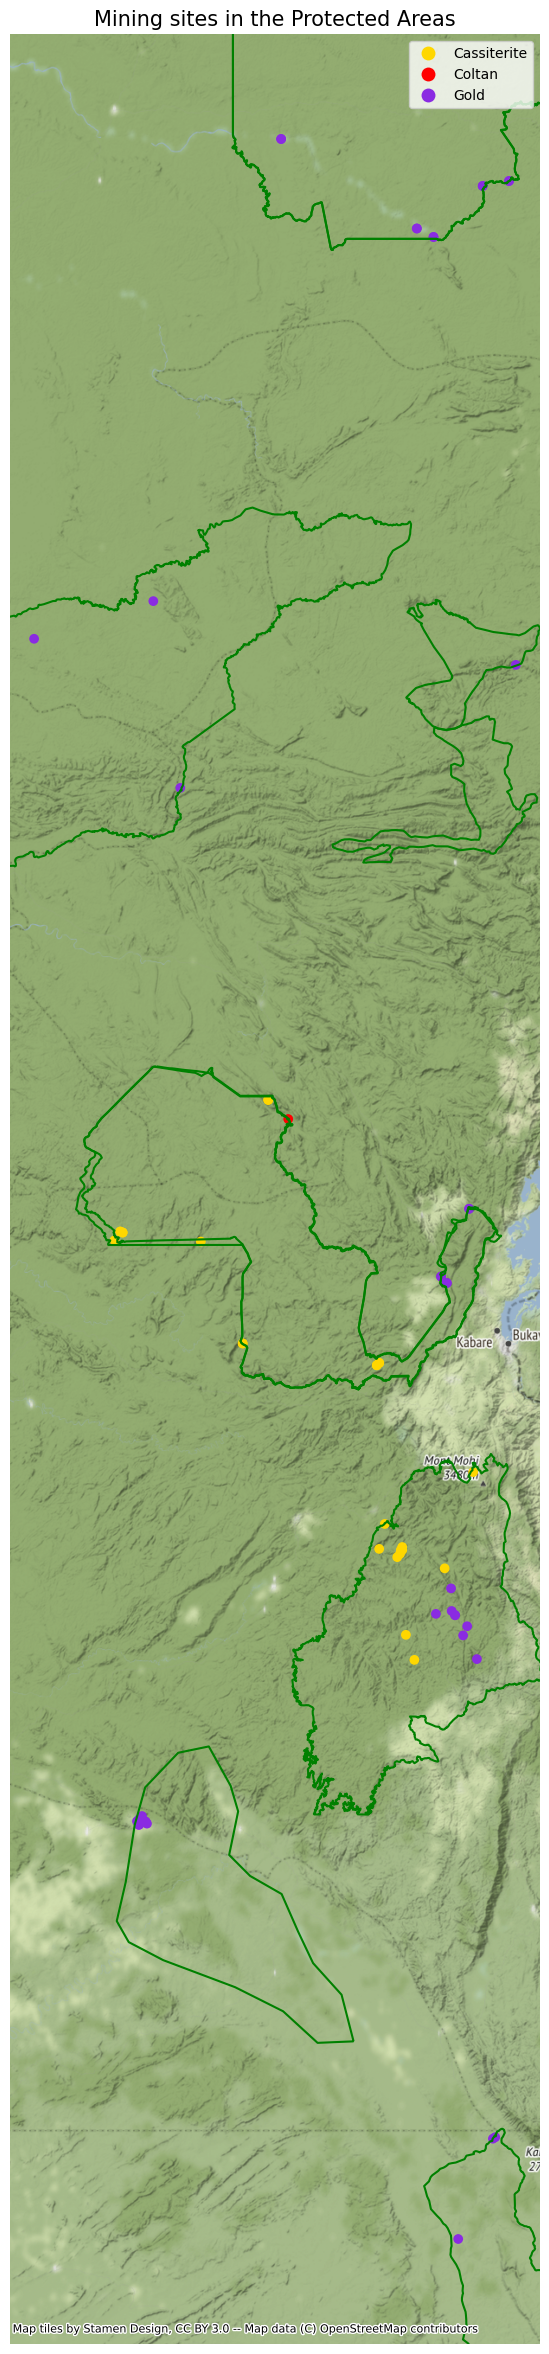

In [261]:
ax=sites_within_park.to_crs("EPSG:3857").plot(figsize=(8,30),column="mineral",cmap=colors.ListedColormap(["gold","red","blueviolet"]),legend=True)
contextily.add_basemap(ax)
protected_areas_utm.to_crs("EPSG:3857").boundary.plot(ax=ax,color="green")
ax.set_axis_off()
plt.title("Mining sites in the Protected Areas",size=15)

In [127]:
sites_within_park.name.unique()

array(['Kiviri/Tayna', 'Lubondozi 3', 'Katamu', 'Kimabwe 1',
       'Lubondozi 1', 'Lubondozi 2', 'Tchangobo', 'Kamungazi katamu',
       'Kimabwe 2', 'Lubondozi 4', 'Ibozia/Kalumé', 'Matamba',
       'Mutete/Mukina', 'Mutete', 'Mazankala', 'Kitendebwa',
       'Sebwa-Lukoma', 'Rwamakaza', 'Mugaba I', 'Mugaba Ouest',
       'Nguba(Nkuba) kamisoke', 'Kananga', 'Nzombe', 'Bitonde foret',
       'Kakanga', 'Kasenge', 'Katotela', 'Makenda1', 'Mayimoto', 'Miki 2',
       'Miki 4', 'Miki 5', 'Nguza', 'Kiandjo', 'Mayengo', 'Cigubi',
       'Mwana', 'Colline 7', 'Shakatembo', 'Colline 5', 'Kiwandawanda',
       'Lugundu', 'Colline 4', 'Kenya', 'Mulolwa', 'Shibukumba', 'Kalemi',
       'Nganda', 'Muchacha', 'Muyembi', 'Paradiso', 'Ujumo Kopa',
       'Angumu (rivière)', 'Maisha'], dtype=object)

In [128]:
mining_sites_utm.loc[0]

visit_date                                      2013-03-27
name                                             Mayi-Tatu
n_workers                                            150.0
mineral                                               Gold
geometry      POINT (796089.4159891906 10111855.174263744)
Name: 0, dtype: object

In [129]:
single_mine = mining_sites_utm.loc[0,"geometry"]

In [130]:
print(single_mine)

POINT (796089.4159891906 10111855.174263744)


In [145]:
dist = protected_areas_utm.distance(single_mine)

In [146]:
dist

0     7.305166e+05
1     2.156737e+04
2     7.805325e+05
3     8.410806e+05
4     1.977867e+06
5     2.033133e+06
6     2.065059e+06
7     1.287711e+06
8     1.365293e+06
9     3.479939e+05
10    3.021341e+05
11    1.081372e+06
12    1.594780e+05
13    1.167624e+06
14    1.649761e+06
15    1.133980e+06
16    1.620460e+06
17    4.837185e+05
18    4.537492e+05
19    8.370019e+04
20    9.295885e+05
21    2.521048e+05
22    2.217272e+05
23    1.578643e+05
24    1.166480e+06
25    1.702607e+06
26    1.942011e+05
27    6.431577e+05
28    5.689090e+05
29    5.648862e+05
30    1.354571e+06
31    1.975936e+06
32    5.229051e+05
33    8.910110e+05
34    6.318370e+05
35    1.340168e+06
36    1.922936e+05
37    2.156707e+04
38    6.704671e+05
39    4.382726e+05
40    2.983529e+05
41    3.477744e+05
42    8.370019e+04
43    8.402286e+05
44    2.156737e+04
dtype: float64

In [147]:
dist.min()

21567.07274475195

In [148]:
dist[22]

221727.16323582426

In [149]:
idx = dist.idxmin()

In [150]:
idx

37

In [151]:
closest_park=protected_areas_utm.loc[idx,"NAME"]
closest_park

'Virunga'

In [152]:
def closest_national_park(geom, national_parks):
    dist = national_parks.distance(geom)
    idx = dist.idxmin()
    closest_park = national_parks.loc[idx,"NAME"]
    return closest_park

In [153]:
closest_national_park(single_mine,protected_areas_utm)

'Virunga'

In [154]:
mining_sites_utm.geometry

0       POINT (796089.416 10111855.174)
1       POINT (795899.664 10110990.840)
2       POINT (795641.707 10109059.787)
3       POINT (794376.309 10110622.250)
4       POINT (796057.504 10105781.548)
                     ...               
2138     POINT (563553.658 9744447.722)
2139     POINT (731723.859 9780128.598)
2140     POINT (732096.620 9779660.636)
2141     POINT (728652.127 9751207.676)
2142     POINT (729069.101 9750106.765)
Name: geometry, Length: 2143, dtype: geometry

In [155]:
mining_sites_utm['closest_park']=mining_sites_utm.geometry.apply(closest_national_park, national_parks=protected_areas_utm)

In [144]:
mining_sites_utm

visit_date                                name  n_workers      mineral  \
0     2013-03-27                           Mayi-Tatu      150.0         Gold   
1     2013-03-27                             Mabanga      115.0         Gold   
2     2013-03-27                             Molende      130.0         Gold   
3     2013-03-27                          Embouchure      135.0         Gold   
4     2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0         Gold   
...          ...                                 ...        ...          ...   
2138  2017-12-14                                  G4      150.0  Cassiterite   
2139  2017-08-28                             Busonga        5.0       Coltan   
2140  2017-08-28                      Buterere/Jolie       15.0   Wolframite   
2141  2017-08-30                           Rusengasi       80.0  Cassiterite   
2142  2017-08-31                            Kambasha       37.0  Cassiterite   

                             geometry  closest_park  
0     POINT (796089.416 10111855.174)       Virunga  
1     POINT (795899.664 10110990.840)       Virunga  
2     POINT (795641.707 10109059.787)       Virunga  
3     POINT (794376.309 10110622.250)       Virunga  
4     POINT (796057.504 10105781.548)       Virunga  
...                               ...           ...  
2138   POINT (563553.658 9744447.722)  Kahuzi-Biega  
2139   POINT (731723.859 9780128.598)  Kahuzi-Biega  
2140   POINT (732096.620 9779660.636)  Kahuzi-Biega  
2141   POINT (728652.127 9751207.676)  Kahuzi-Biega  
2142   POINT (729069.101 9750106.765)  Kahuzi-Biega  

[2143 rows x 6 columns]

In [ ]:
src = rasterio.open(r"D:\Data\trees_central-africa\trees_central-africa\trees_central-africa.tif")

In [ ]:
src

<open DatasetReader name='D:/Data/trees_central-africa/trees_central-africa/trees_central-africa.tif' mode='r'>

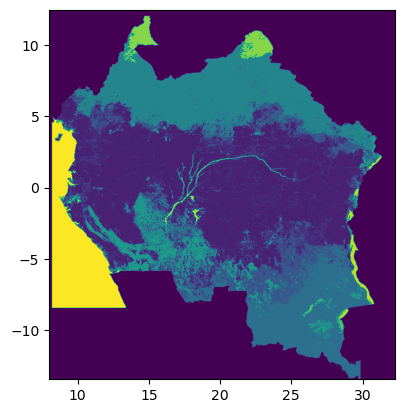

<Figure size 640x480 with 0 Axes>

In [ ]:
ax=rasterio.plot.show(src)
mining_sites_utm.plot(ax=ax,color="red",markersize=1)
plt.show()

In [ ]:
vegetation_raster = r"D:\Data\trees_central-africa\trees_central-africa\trees_central-africa.tif"

In [ ]:
mining_sites_utm['vegetation'] = rasterstats.point_query(mining_sites_utm.geometry, vegetation_raster, interpolate='nearest')

In [ ]:
mining_sites_utm.head()

visit_date                                name  n_workers mineral  \
0  2013-03-27                           Mayi-Tatu      150.0    Gold   
1  2013-03-27                             Mabanga      115.0    Gold   
2  2013-03-27                             Molende      130.0    Gold   
3  2013-03-27                          Embouchure      135.0    Gold   
4  2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0    Gold   

                          geometry closest_park vegetation  
0  POINT (796089.416 10111855.174)      Virunga       None  
1  POINT (795899.664 10110990.840)      Virunga       None  
2  POINT (795641.707 10109059.787)      Virunga       None  
3  POINT (794376.309 10110622.250)      Virunga       None  
4  POINT (796057.504 10105781.548)      Virunga       None

IndexError: index 0 is out of bounds for axis 0 with size 0

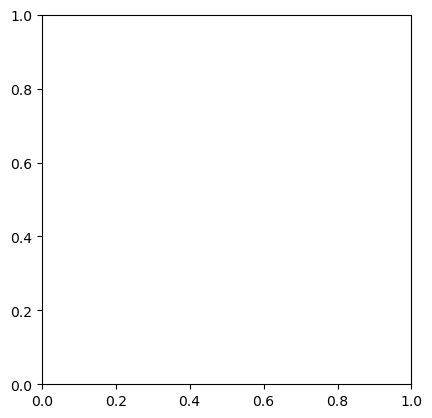

In [ ]:
mining_sites_utm.plot(column='vegetation', legend=True)
plt.show()